# <font color='Orange'><b>Mean-shift Clustering </b></font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_classification
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.io import imread

img_dir = './img/'


# Plotting clusters
def plot_cluster(X, n_clusters_, labels, cluster_centers):

    plt.figure(1)
    plt.clf()
    plt.figure(figsize=(8,8))

    colors = cycle('bgrymckbgrymckbgrymckbgrymck')

    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.', markersize=12)

        if len(cluster_center)==2:
            plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='k', markeredgecolor='none', markersize=8)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

# <font color='orange'><b> Clustering using sklearn library</b></font>


### Plain data

In [2]:
centers = [[1, 1], [-1, -1], [1, -1], [-2,2], [3,3]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
# X array di posizioni (x,y) dei punti generati

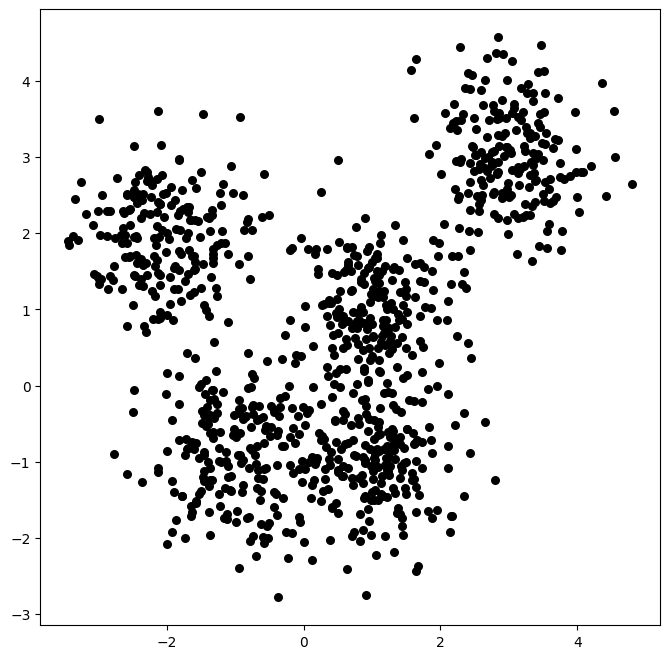

In [3]:
# Plot data
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c='k', s=30)

<Figure size 640x480 with 0 Axes>

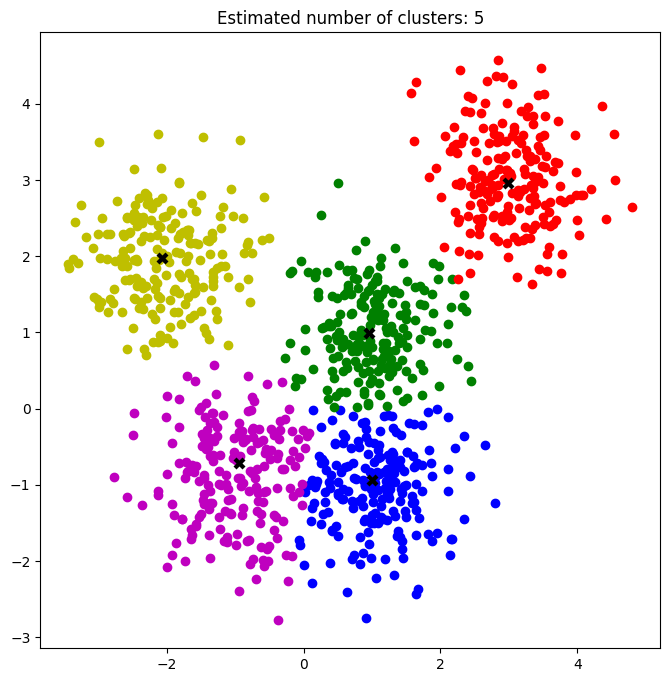

In [4]:
bandwidth = estimate_bandwidth(X, quantile=0.1)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(X)
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
n_clusters_MS= len(labels_unique_MS)

plot_cluster(X, n_clusters_MS, labels_MS, cluster_centers_MS)

### Data with features

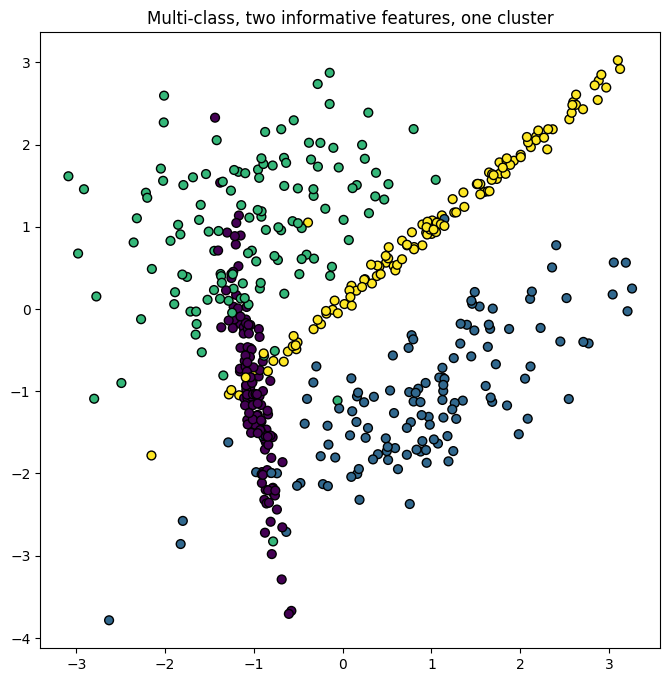

In [5]:
X1, Y1 = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=4)
# X1 array di posizioni nella forma (x,y)
# Y1 array di feature nella forma (a,b) [nel caso delle immagini in formato rgb sarà (r,g,b)]

Y1 = Y1*100     # per rendere le feature più significative

plt.figure(figsize=(8,8))

plt.title("Multi-class, two informative features, one cluster")
plt.scatter(X1[:,0], X1[:,1], marker="o", c=Y1, s=40, edgecolor="k")


[0 1 2 3]
number of estimated clusters : 4


<Figure size 640x480 with 0 Axes>

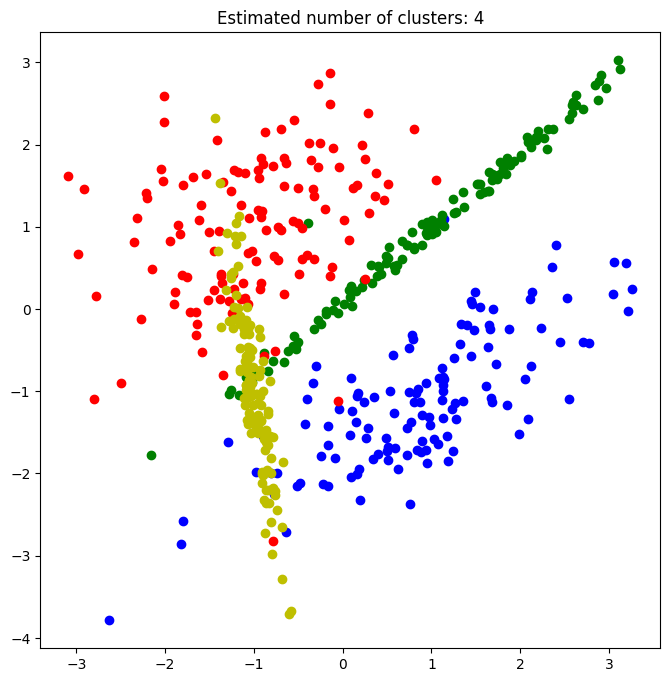

In [6]:
bandwidth = estimate_bandwidth(X1, quantile=0.1)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)


Y1 = np.reshape(Y1, (-1,1))
ms.fit(Y1)          # clustering basato sulle feature, senza tener conto della posizione
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
n_clusters_MS= len(labels_unique_MS)

print(labels_unique_MS)

print("number of estimated clusters : %d" % n_clusters_MS)

plot_cluster(X1, n_clusters_MS, labels_MS, cluster_centers_MS)

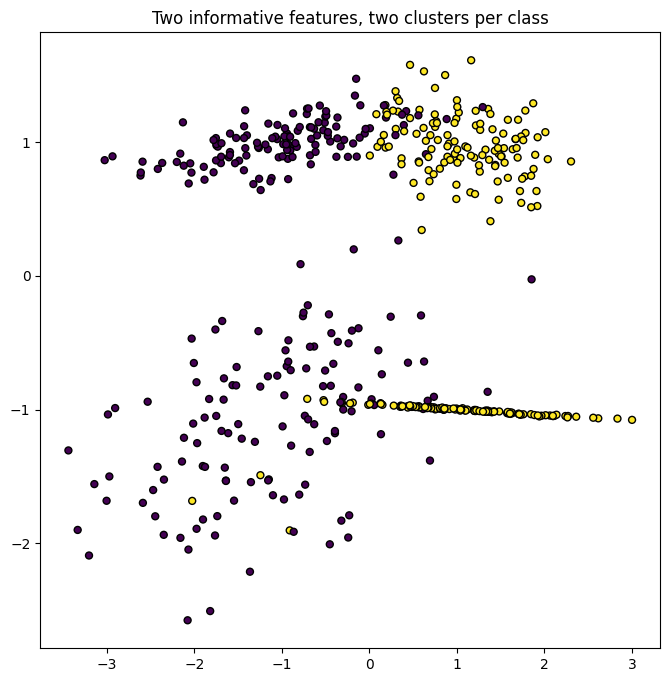

In [22]:
X2, Y2 = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)
Y2 = Y2*100

plt.figure(figsize=(8,8))

plt.title("Two informative features, two clusters per class")
plt.scatter(X2[:,0], X2[:,1], marker="o", c=Y2, s=25, edgecolor="k")

[0 1 2 3]


<Figure size 640x480 with 0 Axes>

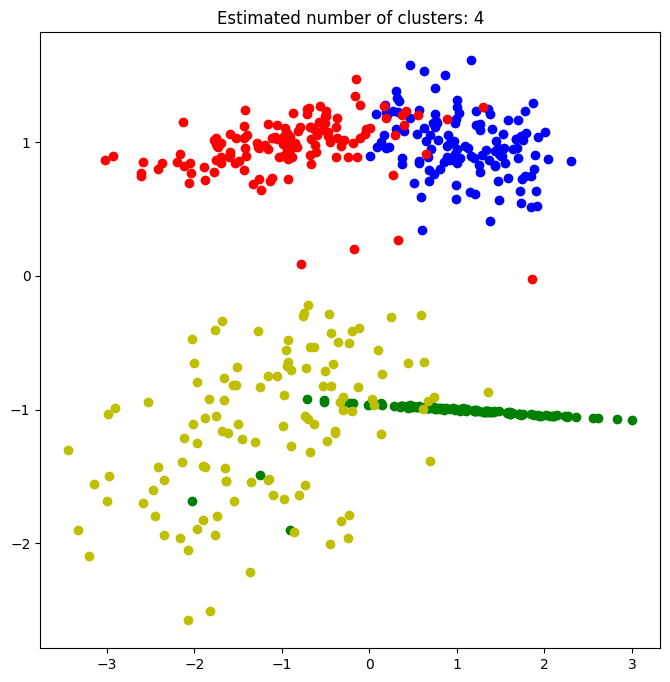

In [23]:
XY2 = np.column_stack((X2, Y2))     # ogni punto ora è p(x,y, f1,f2,...,fn)

bandwidth = estimate_bandwidth(XY2, quantile=0.15)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)


ms.fit(XY2) # tiene conto di posizione e feature
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
print(labels_unique_MS)

n_clusters_MS= len(labels_unique_MS)

plot_cluster(X2, n_clusters_MS, labels_MS, cluster_centers_MS)

## <font color='orange'><b> Mean-shift on Images</b></font> 

(-0.5, 511.5, 383.5, -0.5)

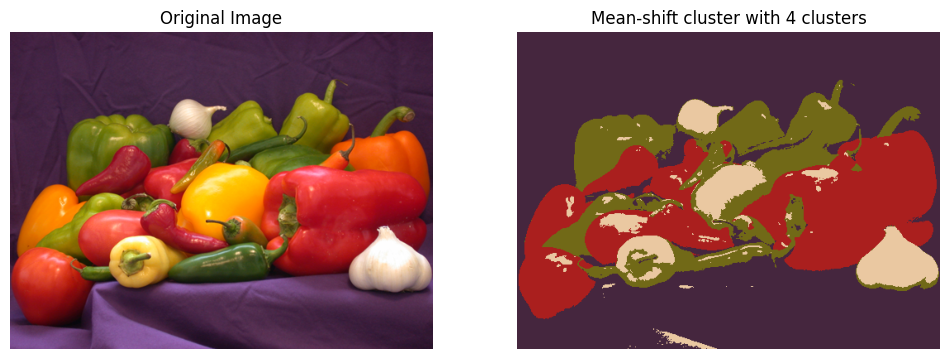

In [29]:
img = imread(img_dir + 'peppers.jpg') # bebe # cigno # peppers # balls
w,h,c = img.shape


# sigmaVal = 3
# winSize = np.uint8(np.round(sigmaVal*3))+1
# if winSize % 2 == 0: 	winSize = winSize +1
# img = cv2.GaussianBlur(img, (winSize,winSize), sigmaVal)

image_array = np.float32(img.reshape((-1,3)))

# The following bandwidth can be automatically detected using ==> critic parameter: "quantile"
bandwidth = estimate_bandwidth(image_array, quantile=0.23,  n_samples=10000)

ms = MeanShift(bandwidth = bandwidth,  bin_seeding=True)
ms.fit(image_array)

labels = ms.labels_
cluster_centers = ms.cluster_centers_.astype(np.uint8)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

res = cluster_centers[labels].reshape(w,h,c)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(res)
plt.title(f'Mean-shift cluster with {n_clusters_} clusters')
plt.axis('off')